In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados do arquivo CSV
df = pd.read_csv('transicao_energetica_brasil.csv')

# Configuração do estilo
sns.set(style="whitegrid")

C:\Users\thmaz\AppData\Local\Temp\ipykernel_7608\3297255382.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Tipo de Energia", y="Produção de Energia (MWh)", data=df, ax=ax, ci=None, estimator=np.mean, palette="Blues")
C:\Users\thmaz\AppData\Local\Temp\ipykernel_7608\3297255382.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Tipo de Energia", y="Produção de Energia (MWh)", data=df, ax=ax, ci=None, estimator=np.mean, palette="Blues")


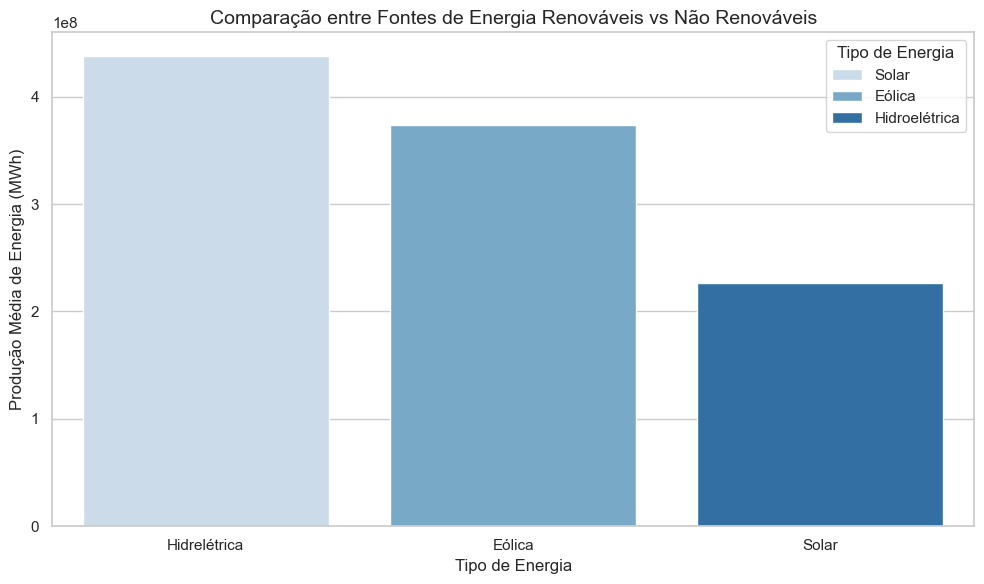

In [2]:
# Gráfico 1: Comparação entre fontes de energia (renováveis vs não renováveis)
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.barplot(x="Tipo de Energia", y="Produção de Energia (MWh)", data=df, ax=ax, ci=None, estimator=np.mean, palette="Blues")
ax.set_title('Comparação entre Fontes de Energia Renováveis vs Não Renováveis', fontsize=14)
ax.set_ylabel('Produção Média de Energia (MWh)', fontsize=12)
ax.set_xlabel('Tipo de Energia', fontsize=12)
ax.legend(title='Tipo de Energia', labels=['Solar', 'Eólica', 'Hidroelétrica'])
plt.tight_layout()

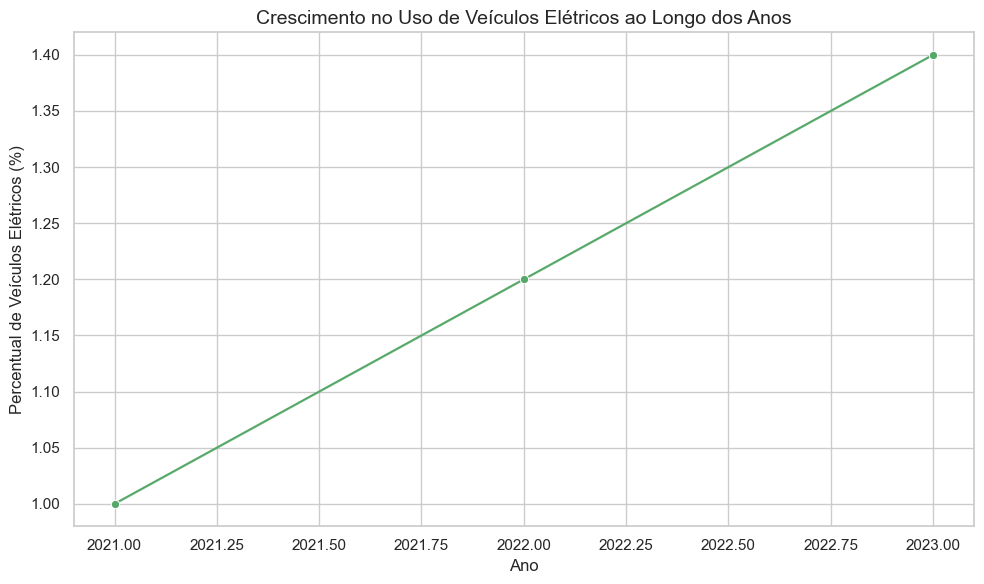

In [3]:
# Gráfico 2: Crescimento no uso de veículos elétricos ao longo dos anos
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.lineplot(x='Ano', y='Percentual de Veículos Elétricos (%)', data=df, marker='o', color='g')
ax.set_title('Crescimento no Uso de Veículos Elétricos ao Longo dos Anos', fontsize=14)
ax.set_ylabel('Percentual de Veículos Elétricos (%)', fontsize=12)
ax.set_xlabel('Ano', fontsize=12)
plt.tight_layout()

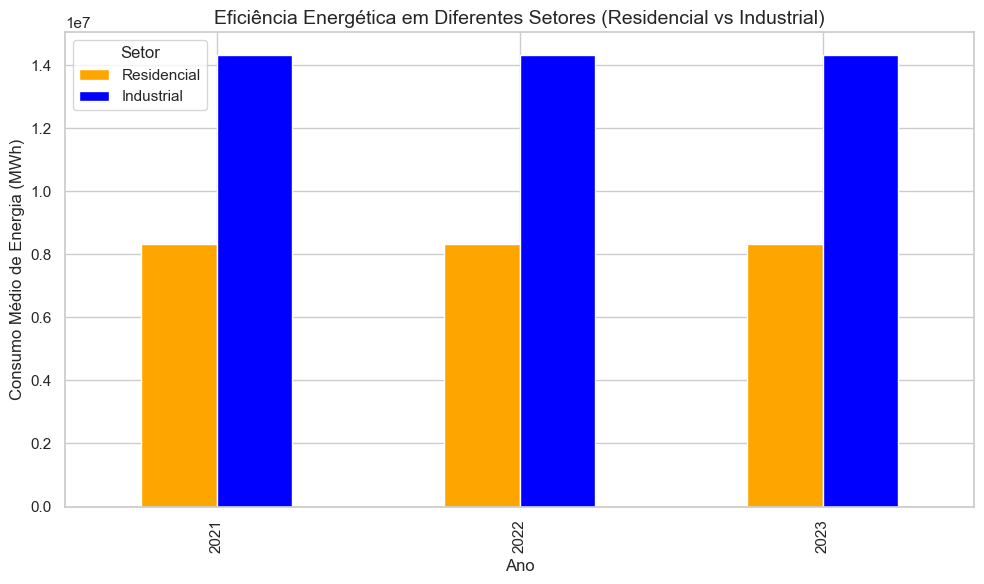

In [4]:
# Gráfico 3: Eficiência Energética em Diferentes Setores
df_setores = df[['Ano', 'Consumo Residencial (MWh)', 'Consumo Industrial (MWh)']]
df_setores = df_setores.groupby('Ano').mean().reset_index()
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
df_setores.plot(x='Ano', kind='bar', stacked=False, ax=ax, color=['orange', 'blue'])
ax.set_title('Eficiência Energética em Diferentes Setores (Residencial vs Industrial)', fontsize=14)
ax.set_ylabel('Consumo Médio de Energia (MWh)', fontsize=12)
ax.set_xlabel('Ano', fontsize=12)
ax.legend(title='Setor', labels=['Residencial', 'Industrial'])
plt.tight_layout()

C:\Users\thmaz\AppData\Local\Temp\ipykernel_7608\3314906584.py:7: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\thmaz\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  func(*args, **kwargs)
C:\Users\thmaz\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


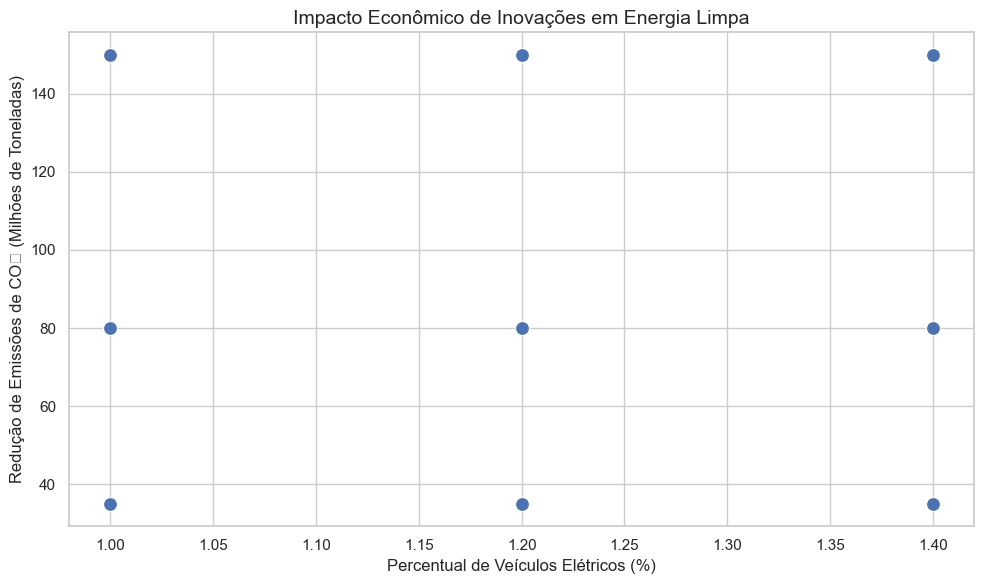

In [5]:
# Gráfico 4: Impacto Econômico de Inovações em Energia Limpa
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.scatterplot(x='Percentual de Veículos Elétricos (%)', y='Redução de Emissões de CO₂ (Milhões de Toneladas)', data=df, color='b', s=100)
ax.set_title('Impacto Econômico de Inovações em Energia Limpa', fontsize=14)
ax.set_ylabel('Redução de Emissões de CO₂ (Milhões de Toneladas)', fontsize=12)
ax.set_xlabel('Percentual de Veículos Elétricos (%)', fontsize=12)
plt.tight_layout()


C:\Users\thmaz\AppData\Local\Temp\ipykernel_7608\1728346524.py:7: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\thmaz\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  func(*args, **kwargs)
C:\Users\thmaz\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


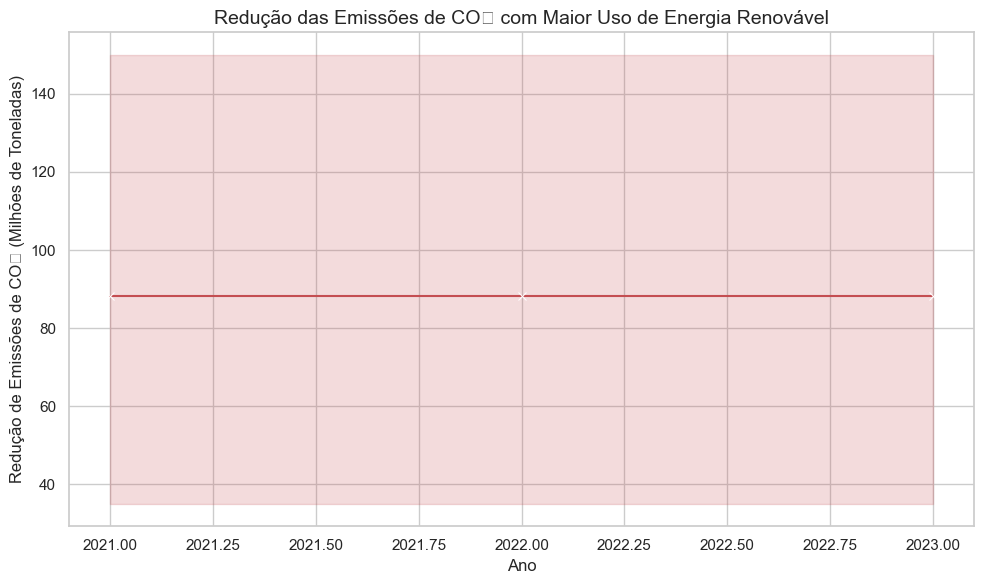

In [6]:
# Gráfico 5: Redução das Emissões de CO₂ em Áreas com Maior Uso de Energia Renovável
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.lineplot(x='Ano', y='Redução de Emissões de CO₂ (Milhões de Toneladas)', data=df, marker='x', color='r')
ax.set_title('Redução das Emissões de CO₂ com Maior Uso de Energia Renovável', fontsize=14)
ax.set_ylabel('Redução de Emissões de CO₂ (Milhões de Toneladas)', fontsize=12)
ax.set_xlabel('Ano', fontsize=12)
plt.tight_layout()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Seleção das variáveis para o modelo de regressão
X = df[["Produção de Energia (MWh)", "Consumo Residencial (MWh)", 
          "Consumo Industrial (MWh)", "Percentual de Veículos Elétricos (%)"]]
y = df["Redução de Emissões de CO₂ (Milhões de Toneladas)"]

# Divisão dos dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criação e treinamento do modelo de regressão
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Previsões e avaliação do modelo
y_pred = reg_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

reg_model.coef_, reg_model.intercept_, mse, r2


(array([ 9.68189398e-08,  1.17487750e-06,  4.54033070e-06, -9.16272891e-15]),
 -20.01349303445815,
 2.0194839173657902e-28,
 0.0)

In [12]:
from flask import Flask, request, jsonify
import pickle
import pandas as pd

# Inicialização da aplicação Flask
app = Flask(__name__)

# Carregar modelos preditivos previamente treinados
model_paths = {
    'regression': 'models/transicao_energetica_brasil.csv',
    'classification': 'models/transicao_energetica_brasil.csv',
    'clustering': 'models/transicao_energetica_brasil.csv'
}

models = {}
for model_type, path in model_paths.items():
    try:
        with open(path, 'rb') as f:
            models[model_type] = pickle.load(f)
    except FileNotFoundError:
        print(f"Modelo {model_type} não encontrado em {path}.")

@app.route('/')
def home():
    return "API de Modelos Preditivos Integrados!"

@app.route('/predict/<model_type>', methods=['POST'])
def predict(model_type):
    if model_type not in models:
        return jsonify({"error": f"Modelo '{model_type}' não está disponível."}), 404

    model = models[model_type]
    try:
        # Receber os dados em formato JSON
        data = request.get_json()
        df = pd.DataFrame(data)

        # Fazer previsões com base no modelo
        if model_type == 'clustering':
            predictions = model.predict(df)
        else:
            predictions = model.predict(df.values)

        return jsonify({"predictions": predictions.tolist()})
    except Exception as e:
        return jsonify({"error": str(e)}), 500

if __name__ == '__main__':
    app.run(debug=True)


Modelo regression não encontrado em models/transicao_energetica_brasil.csv.
Modelo classification não encontrado em models/transicao_energetica_brasil.csv.
Modelo clustering não encontrado em models/transicao_energetica_brasil.csv.
 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

In [ ]:
## https://www.ibge.gov.br
## https://www.gov.br/aneel/pt-br/
## https://www.gov.br/mme/pt-br
## https://www.ons.org.br
## https://www.gov.br/inpe/pt-br